###INTEGRANTES

Cesar Enrique Rojas Hernandez - 2191952

Santiago Andres Delgado Quiceno - 211799

Mariana Robayo Nieto - 2195092

# **Modelo de deteccion de estado de semaforos para ayudar a personas invidentes**

In [ ]:
#@title Introduccion { display-mode: "form" }
from IPython.display import Image, display
url = "https://2.bp.blogspot.com/-Lz6hTiQT5LM/XCXD4kM7CqI/AAAAAAAACp4/\
gtenbm5odpQNPkaczgCJ8nMN8NJFF18iwCLcBGAs/s1600/jumilla-instalara-semaforos-para-invidentes.jpg"
display(Image(url=url))

El problema de autonomía para las personas invidentes al desplazarse por las calles radica en la falta de conciencia de los conductores y la dificultad para conocer el estado de los semáforos. Esto pone en riesgo su seguridad y limita su movilidad. Para abordar esta situación, se propone desarrollar un modelo de inteligencia artificial que aprenda a detectar el estado de los semáforos y proporcione indicaciones a las personas invidentes, permitiéndoles cruzar de manera más segura y autónoma.

In [1]:
#@title { display-mode: "form" }
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
from tqdm.notebook import tqdm
from PIL import Image

In [4]:
data_dir = '/content/drive/MyDrive/Inteligencia_Artificial/Proyecto/SEMAFOROS/' # Ruta de tu directorio DataSet en Google Drive
red_dir = os.path.join(data_dir, 'rojo')
green_dir = os.path.join(data_dir, 'verde')
img_size = (128, 128)  # Tamaño de imagen deseado

red_images_resized = []
for filename in tqdm(os.listdir(red_dir)):
    img = cv2.imread(os.path.join(red_dir, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convierte las imágenes a RGB si es necesario
    resized_img = cv2.resize(img, img_size)
    red_images_resized.append(resized_img)

green_images_resized = []
for filename in tqdm(os.listdir(green_dir)):
    img = cv2.imread(os.path.join(green_dir, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convierte las imágenes a RGB si es necesario
    resized_img = cv2.resize(img, img_size)
    green_images_resized.append(resized_img)


  0%|          | 0/1040 [00:00<?, ?it/s]

  0%|          | 0/1025 [00:00<?, ?it/s]

In [5]:
# Crear etiquetas para las imágenes
red_labels = np.zeros(len(red_images_resized))
green_labels = np.ones(len(green_images_resized))

X = np.concatenate((red_images_resized, green_images_resized), axis=0)
y = np.concatenate((red_labels,green_labels), axis =0)

In [6]:
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X = None
data_dir = None
filename = None
green_dir = None
green_images_normalized = None
green_images_resized = None
green_labels = None
img = None
img_size = None
indices = None
red_dir = None
red_images_normalized = None
red_images_resized = None
red_labels = None
resized_img = None
url = None
y = None

In [ ]:
X_train[0].shape

(128, 128, 3)

In [8]:
model = None
model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=X_train[0].shape),
    keras.layers.Conv2D(128, (4, 4), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((3, 3)),
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
30/30 [==============================] - 15s 55ms/step - loss: 0.6002 - accuracy: 0.6647 - val_loss: 0.4640 - val_accuracy: 0.7826
Epoch 2/15
30/30 [==============================] - 1s 39ms/step - loss: 0.4026 - accuracy: 0.8235 - val_loss: 0.3219 - val_accuracy: 0.8502
Epoch 3/15
30/30 [==============================] - 1s 39ms/step - loss: 0.2654 - accuracy: 0.9074 - val_loss: 0.2175 - val_accuracy: 0.8937
Epoch 4/15
30/30 [==============================] - 1s 39ms/step - loss: 0.1881 - accuracy: 0.9322 - val_loss: 0.1373 - val_accuracy: 0.9614
Epoch 5/15
30/30 [==============================] - 1s 38ms/step - loss: 0.1648 - accuracy: 0.9413 - val_loss: 0.1619 - val_accuracy: 0.9420
Epoch 6/15
30/30 [==============================] - 1s 38ms/step - loss: 0.1650 - accuracy: 0.9424 - val_loss: 0.1236 - val_accuracy: 0.9710
Epoch 7/15
30/30 [==============================] - 1s 41ms/step - loss: 0.1269 - accuracy: 0.9516 - val_loss: 0.0945 - val_accuracy: 0.9710
Epoch 8/15
3

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 9ms/step - loss: 0.1123 - accuracy: 0.9565
Test accuracy: 0.95652174949646


In [11]:
import matplotlib.pyplot as plt
predictions = model.predict(X_test)

7/7 [==============================] - 0s 7ms/step


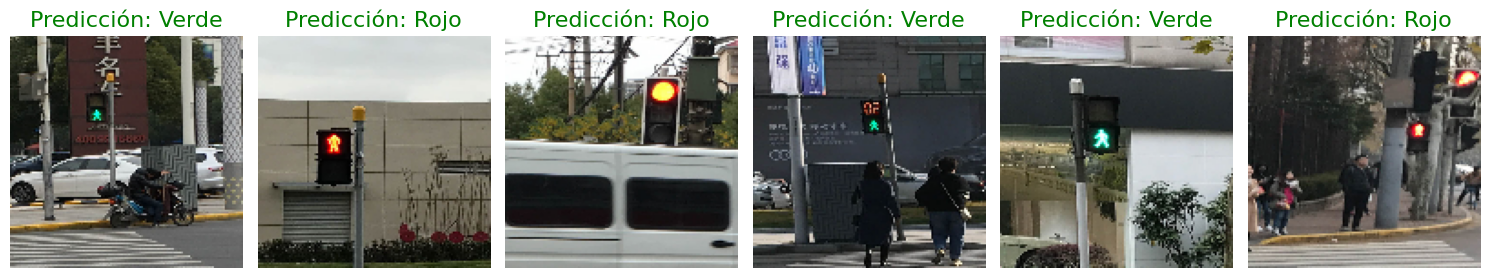

In [12]:
# Seleccionar algunas imágenes de prueba para visualizar
num_images = 6  # Número de imágenes para visualizar

# Obtener índices aleatorios de las imágenes de prueba
# random_indices = np.random.choice(len(X_test), size=num_images**2, replace=False)
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)

# Visualizar las imágenes y las predicciones
fig, axes = plt.subplots(1, num_images, figsize=(15, 10))

for i, index in enumerate(random_indices):
    image = X_test[index]
    prediction = predictions[index]
    label = y_test[index]

    # Configurar el título de la imagen con el resultado de la predicción
    title = 'Predicción: Verde' if prediction > 0.5 else 'Predicción: Rojo'

    # Configurar el color del título según la precisión de la predicción
    title_color = 'green' if (prediction > 0.5 and label == 1) or (prediction <= 0.5 and label == 0) else 'red'

    # Mostrar la imagen y el título en el subplot correspondiente
    # ax = axes[i // num_images, i % num_images]
    ax = axes[i]
    ax.imshow(image)
    ax.set_title(title, fontdict={"fontsize": 16}, color=title_color)
    ax.axis('off')

# Ajustar el espaciado entre los subplots y mostrar la figura
plt.tight_layout()
plt.show()

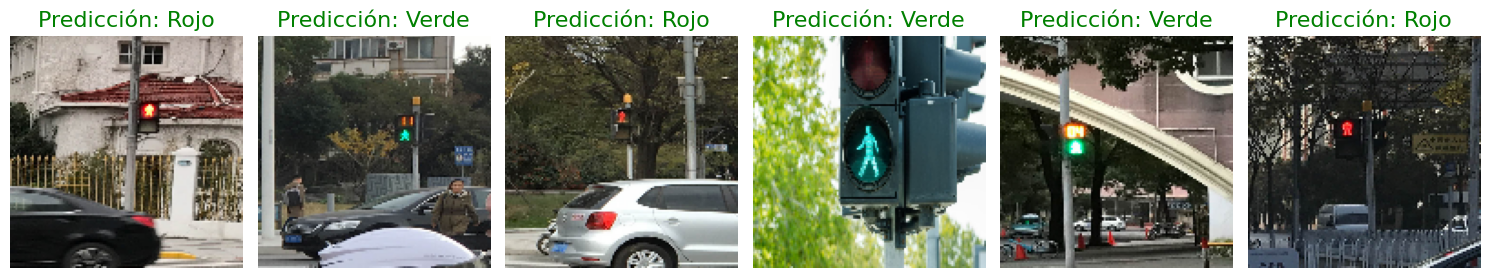

In [13]:
# Seleccionar algunas imágenes de prueba para visualizar
num_images = 6  # Número de imágenes para visualizar

# Obtener índices aleatorios de las imágenes de prueba
# random_indices = np.random.choice(len(X_test), size=num_images**2, replace=False)
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)

# Visualizar las imágenes y las predicciones
fig, axes = plt.subplots(1, num_images, figsize=(15, 10))

for i, index in enumerate(random_indices):
    image = X_test[index]
    prediction = predictions[index]
    label = y_test[index]

    # Configurar el título de la imagen con el resultado de la predicción
    title = 'Predicción: Verde' if prediction > 0.5 else 'Predicción: Rojo'

    # Configurar el color del título según la precisión de la predicción
    title_color = 'green' if (prediction > 0.5 and label == 1) or (prediction <= 0.5 and label == 0) else 'red'

    # Mostrar la imagen y el título en el subplot correspondiente
    # ax = axes[i // num_images, i % num_images]
    ax = axes[i]
    ax.imshow(image)
    ax.set_title(title, fontdict={"fontsize": 16}, color=title_color)
    ax.axis('off')

# Ajustar el espaciado entre los subplots y mostrar la figura
plt.tight_layout()
plt.show()

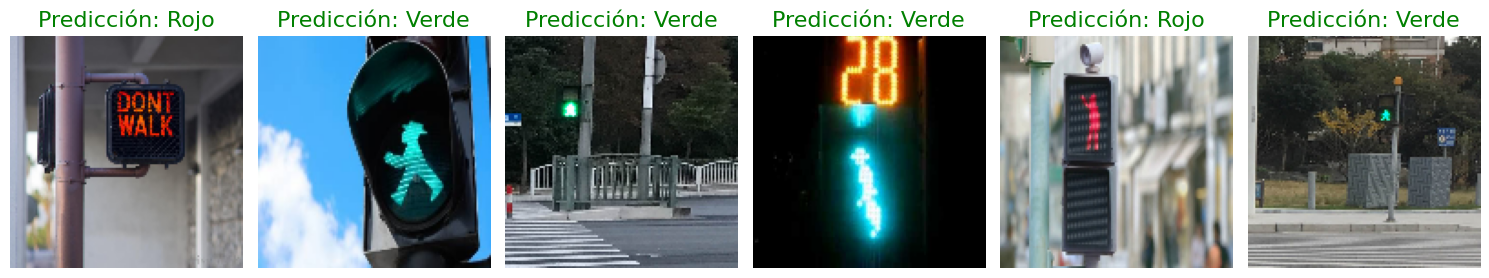

In [14]:
# Seleccionar algunas imágenes de prueba para visualizar
num_images = 6  # Número de imágenes para visualizar

# Obtener índices aleatorios de las imágenes de prueba
# random_indices = np.random.choice(len(X_test), size=num_images**2, replace=False)
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)

# Visualizar las imágenes y las predicciones
fig, axes = plt.subplots(1, num_images, figsize=(15, 10))

for i, index in enumerate(random_indices):
    image = X_test[index]
    prediction = predictions[index]
    label = y_test[index]

    # Configurar el título de la imagen con el resultado de la predicción
    title = 'Predicción: Verde' if prediction > 0.5 else 'Predicción: Rojo'

    # Configurar el color del título según la precisión de la predicción
    title_color = 'green' if (prediction > 0.5 and label == 1) or (prediction <= 0.5 and label == 0) else 'red'

    # Mostrar la imagen y el título en el subplot correspondiente
    # ax = axes[i // num_images, i % num_images]
    ax = axes[i]
    ax.imshow(image)
    ax.set_title(title, fontdict={"fontsize": 16}, color=title_color)
    ax.axis('off')

# Ajustar el espaciado entre los subplots y mostrar la figura
plt.tight_layout()
plt.show()